Test MSE: 146.329
MSE =  [146.32870375]
RMSE =  12.096640184405102
MAE =  [10.07427042]
Target Variance =  681.1809959999996
Target Standard Deviation =  26.099444361901647


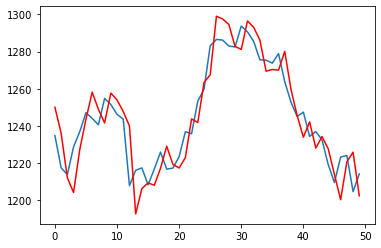

E:\aconda\aconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Test MSE: 0.264
MSE =  [0.2643392]
RMSE =  0.5141392792183804
MAE =  [0.42246437]
Target Variance =  0.09196844830625932
Target Standard Deviation =  0.303263001875038


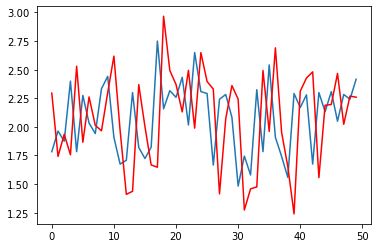

E:\aconda\aconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Test MSE: 0.000
MSE =  [6.73191229e-05]
RMSE =  0.008204823151177971
MAE =  [0.00632875]
Target Variance =  5.6625911832091394e-05
Target Standard Deviation =  0.007525019058586589


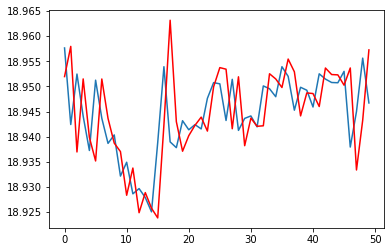

Test MSE: 0.065
MSE =  [0.06487167]
RMSE =  0.2546991791064577
MAE =  [0.19815133]
Target Variance =  0.0333966225604356
Target Standard Deviation =  0.18274742832783064


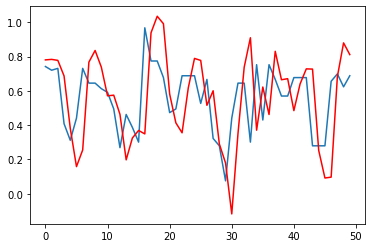

In [10]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
series = pd.read_excel(r'C:\Users\stu\Desktop\RDATA.xlsx')
# fit model
X1 =series.values
prediction1=[]
MSE=[]
RMSE=[]
MAE=[]
for i in range(4):
    X=X1[:,i][0:1950]
    #size = int(len(X) * 0.95)
    #train, test = X[0:size], X[size:len(X)]
    train, test = X, X1[:,i][1950:2000]
    history = [x for x in train]
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=(2,2,0))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        #print('predicted=%f, expected=%f' % (yhat, obs))
    error = mean_squared_error(test, predictions)
    print('Test MSE: %.3f' % error)

    target = test
    prediction1.append(predictions)
    error = []
    for j in range(len(target)):
        error.append(target[j] - prediction1[i][j])

    squaredError = []
    absError = []
    for val in error:
        squaredError.append(val * val)#target-prediction之差平方 
        absError.append(abs(val))#误差绝对值
#print("Square Error: ", squaredError)
#print("Absolute Value of Error: ", absErr)
    print("MSE = ", sum(squaredError) / len(squaredError))#均方误差MSE
    MSE.append(sum(squaredError) / len(squaredError))
    from math import sqrt
    print("RMSE = ", sqrt(sum(squaredError) / len(squaredError)))#均方根误差RMSE
    RMSE.append(sqrt(sum(squaredError) / len(squaredError)))
    print("MAE = ", sum(absError) / len(absError))#平均绝对误差MAE
    MAE.append(sum(absError) / len(absError))
    targetDeviation = []
    targetMean = sum(target) / len(target)#target平均值
    for val in target:
        targetDeviation.append((val - targetMean) * (val - targetMean))
    print("Target Variance = ", sum(targetDeviation) / len(targetDeviation))#方差
    print("Target Standard Deviation = ", sqrt(sum(targetDeviation) / len(targetDeviation)))#标准差
    target=[]
    pyplot.plot(test)
    pyplot.plot(predictions, color='red')
    pyplot.show()


# plot



In [11]:
import xlsxwriter   #导入模块

workbook = xlsxwriter.Workbook('Larima.xlsx')     #新建excel表
worksheet= workbook.add_worksheet('sheet1')
worksheet2= workbook.add_worksheet('sheet2')
#worksheet= ['CPU1','CPU2','Load1','Load2','Memory1','Memory2']     #设置表头
headings = ['stock','cpu1','goods','thyroid']   
worksheet.write_row('A1',headings)
worksheet.write_column('A2',np.array(prediction1)[0])
worksheet.write_column('B2',np.array(prediction1)[1])
worksheet.write_column('C2',np.array(prediction1)[2]) 
worksheet.write_column('D2',np.array(prediction1)[3])
#worksheet.write_column('E2',np.array(prediction1)[4])
#worksheet.write_column('F2',np.array(prediction1)[5]) 
headings2 = ['MSE','RMSE','MAE'] 
worksheet2.write_row('A1',headings2)
worksheet2.write_column('A2',np.array(MSE))
worksheet2.write_column('B2',np.array(RMSE))
worksheet2.write_column('C2',np.array(MAE)) 
#将数据插入到表格中 
workbook.close() 

AttributeError: 'list' object has no attribute 'shape'